Import dependencies

In [1]:
import numpy as np 
import pandas as pd 
import csv

Import the file containing the location data of all the sensors (cycles + cars). The file aurrently has only the location data of sensors counting cars.

In [2]:
location_data = pd.read_csv('tellepunkter.csv',sep=',')
#Look into the format of the imported data
location_data.head()

,SENSOR_ID,SENSOR_NAVN,LATITUDE,LONGITUDE,STREKNING_NAVN,FORMAT,SENSOR_STATUS,SENSOR_TYPE,OPPLOSNING
0,300022,Klemetsrud,6639461.0,267073.16,EV6 HP 1 Meter 1191,Datainn,Ute av drift,Bil,Enkeltkjøret
1,300025,Granfoss NORD,6651245.5,257096.33,RV150 HP 1 Meter 12178,Nortraf,Ute av drift,Bil,15 minutter
2,300026,Påkj granfoss Nord,6651222.5,257081.31,RV150 HP 92 Meter 21222,Nortraf,Ute av drift,Bil,15 minutter
3,300027,Avkj Granfoss nord,6651241.5,257070.92,RV150 HP 92 Meter 12020,Nortraf,Ute av drift,Bil,15 minutter
4,300038,VESTBANEKRYSSET,6649293.5,261140.28,EV18 HP 94 Meter 14680,Nortraf,Ute av drift,Bil,15 minutter


Import the car, cycle and met data

In [3]:
car_data = pd.read_csv('car_feb2015_feb2016.csv',sep=';')
print("Rows in car data ",len(car_data))
car_data.head()

Rows in car data  101669


,SENSOR_ID,YEAR,MONTH,DAY,STARTHOUR,DIRECTION,RESOLUTION,SUM,AVGSPEED
0,300016,2015,2,1,0,1,HOURLY,381,74.104986
1,300016,2015,2,1,1,1,HOURLY,284,74.419014
2,300016,2015,2,1,2,1,HOURLY,165,73.666666
3,300016,2015,2,1,3,1,HOURLY,98,74.846938
4,300016,2015,2,1,4,1,HOURLY,87,77.517241


In [4]:
#for sensor_id in list(car_data['SENSOR_ID'].unique()):
#    print(sensor_id)
#Only retain the relevant sensor data location
location_data = location_data[(location_data.SENSOR_ID==300016)| (location_data.SENSOR_ID==300083)| 
                              (location_data.SENSOR_ID==300099)| (location_data.SENSOR_ID==300233)| 
                              (location_data.SENSOR_ID==302257)]

In [5]:
cycle_data = pd.read_csv('cycle_feb2015_feb2016.csv',sep=',')
print("Rows in cycle data ",len(cycle_data))
cycle_data.head()

Rows in cycle data  868084


,SENSOR_ID,TIME,LANE,SUM,RESOLUTION
0,10000010,2015-02-01T00:00:00,99.0,5.0,HOURLY
1,10000010,2015-02-01T01:00:00,99.0,2.0,HOURLY
2,10000010,2015-02-01T02:00:00,99.0,6.0,HOURLY
3,10000010,2015-02-01T03:00:00,99.0,5.0,HOURLY
4,10000010,2015-02-01T04:00:00,99.0,4.0,HOURLY


In [6]:
weather_data = pd.read_csv('Oslo_Blindern_Weather.csv',sep=';')
print("Rows in the met data ",len(weather_data))
weather_data.head()

Rows in the met data  8784


,St.no,Year,Mnth,Date,Time,DirectionDeg,Speedmps,TempC,Pptmm,Humidpercen,Snowdepthcm
0,18700,2015,2,1,1,7,5.8,-1.0,0.0,75,
1,18700,2015,2,1,2,6,6.2,-1.3,0.0,77,
2,18700,2015,2,1,3,12,6.5,-1.5,0.1,79,
3,18700,2015,2,1,4,7,5.9,-1.5,0.0,76,
4,18700,2015,2,1,5,5,6.3,-1.7,0.0,77,


In [7]:
#Looking at the data we realized that location of only 74 sensors is available. We convert the coordinates of these
#sensors from UTM to lat-lon for plotting their location later in this notebook.
latitude_UTM=location_data['LATITUDE'].values[0:74]
longitude_UTM=location_data['LONGITUDE'].values[0:74]
lats = []
lons = []
import utm
for i in range(len(latitude_UTM)):
    temp_lats,temp_lons=utm.to_latlon(longitude_UTM[i], latitude_UTM[i], 33, 'U')
    lats.append(temp_lats),lons.append(temp_lons)
labels=location_data['SENSOR_ID'].values[0:74]

In [8]:
for sensor_id in list(cycle_data['SENSOR_ID'].unique()):
    missing=cycle_data[cycle_data.SENSOR_ID==sensor_id].isnull().values.any()
    if missing==False:
        print("Sensor id ",sensor_id, location_data[location_data.SENSOR_ID==sensor_id].SENSOR_NAVN.values,
              "Rows ",len(cycle_data[cycle_data.SENSOR_ID==sensor_id]))

Sensor id  10000010 [] Rows  9506
Sensor id  10000210 [] Rows  26283
Sensor id  10000480 [] Rows  26283
Sensor id  10000790 [] Rows  26283


I then used google earth to extract the coordinates of these locations.
 * 10000010 (59°55'59.53"N,  10°45'27.53"E)
 * 10000210 (59°52'33.68"N,  10°47'21.58"E)
 * 10000480 (59°57'17.15"N,  10°45'40.28"E) 
 * 10000790 (59°55'14.14"N,  10°44'31.83"E)

Let us plot these cordinates

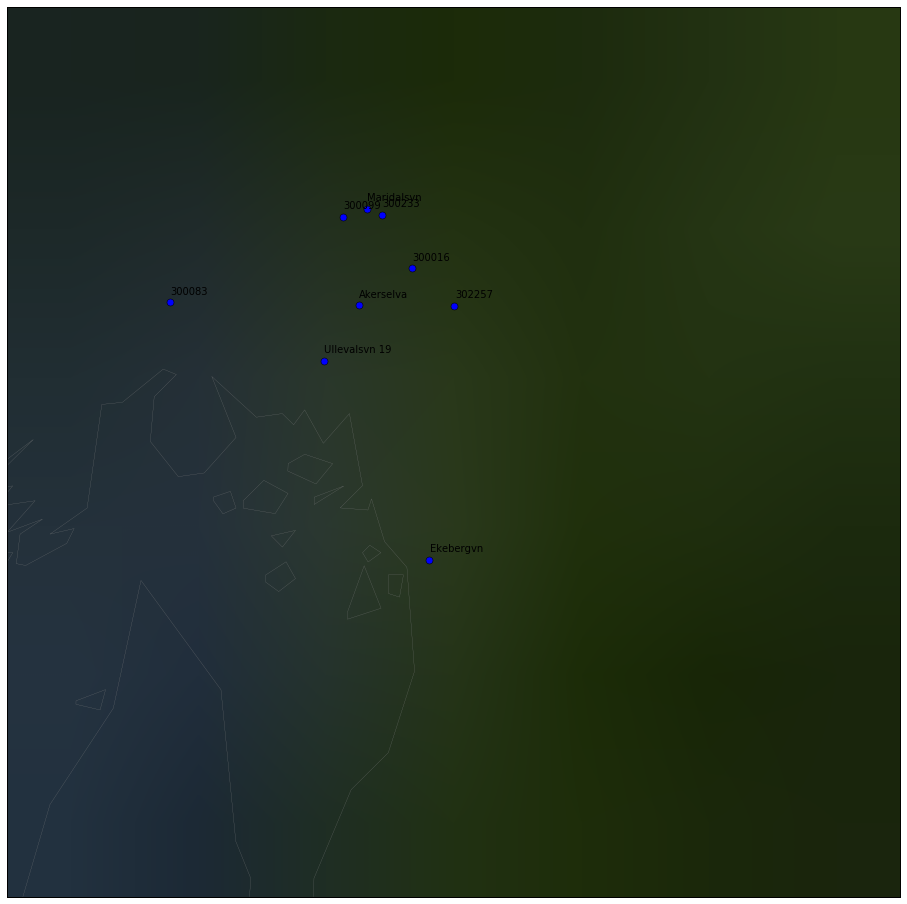

In [9]:
lats.append(59+55/60+14/3600); lons.append(10+44/60+31/3600)
lats.append(59+57/60+17/3600); lons.append(10+45/60+40/3600)
lats.append(59+52/60+33/3600); lons.append(10+47/60+21/3600)
lats.append(59+55/60+59/3600); lons.append(10+45/60+27/3600)

labels=np.append(labels,'Ullevalsvn 19')
labels=np.append(labels,'Maridalsvn')
labels=np.append(labels,'Ekebergvn')
labels=np.append(labels,'Akerselva')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
map = Basemap(projection='merc',resolution = 'h', area_thresh = 0.1,
              llcrnrlon=10.6, llcrnrlat=59.8,urcrnrlon=11, urcrnrlat=60)
plt.figure(figsize=(16,16))
map.drawcoastlines(linewidth=0.2,color='grey')
map.drawcountries(linewidth=0.2,color='grey')
map.drawmapboundary()
#map.shadedrelief()
map.bluemarble()
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=7)
x_offsets = 20*np.ones_like(lats)
y_offsets = 400*np.ones_like(lats)
for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)

#plt.savefig('bessaker.pdf',bbox_inches='tight')
plt.show()


Clean and format the data

In [10]:
cycle_data['TIME'] =  pd.to_datetime(cycle_data['TIME'], format='%Y-%m-%dT%H:%M:%S.%f')
cycle_data = cycle_data.drop(["RESOLUTION"],axis=1)

In [11]:
df2=pd.DataFrame(weather_data[['Year','Mnth','Date','Time']]).rename(columns={'Year': 'year', 'Mnth': 'month', 'Date':'day','Time':'Hour'})
weather_data['TIME']=pd.to_datetime(df2)
weather_data=weather_data.drop(["Year","Mnth","Date","Time","Snowdepthcm","DirectionDeg"],axis=1)

In [12]:
df3=pd.DataFrame(car_data[['YEAR','MONTH','DAY','STARTHOUR']]).rename(columns={'YEAR': 'year', 'MONTH': 'month', 'DAY':'day','STARTHOUR':'Hour'})
car_data['TIME']=pd.to_datetime(df3)
car_data=car_data.drop(["YEAR","MONTH","DAY","STARTHOUR","RESOLUTION"],axis=1)

In [13]:
weather_data.rename(columns={'Speedmps':'WIND_MAG','Pptmm':
                             'PPT','Humidpercen':'RH','TempC':'TEMP',
                             'Snowdepthcm':'SNOW_DEPTH','St.no':'STATION_ID'}, inplace=True)

Merge the car anc cycle data with the weather data

In [14]:
cycle_met = cycle_data.merge(weather_data,on=['TIME'])

In [15]:
car_met = car_data.merge(weather_data,on=['TIME'])

In [16]:
print("Rows in cycling data combined with met ",len(cycle_met))
print("Rows in car data combined with met ",len(car_met))

Rows in cycling data combined with met  867985
Rows in car data combined with met  101661


In [17]:
import calendar
cycle_met['WEEKDAY'] = cycle_met['TIME'].dt.weekday_name #Insert a column with weekday name
cycle_met['MONTH'] = cycle_met['TIME'].dt.month #Insert a column with month number
cycle_met['MONTH'] = cycle_met['MONTH'].apply(lambda x: calendar.month_abbr[x]) #Conver month no. to month name
cycle_met['HOUR'] = cycle_met['TIME'].dt.hour #Insert a column with hour

car_met['WEEKDAY'] = car_met['TIME'].dt.weekday_name
car_met['MONTH'] = car_met['TIME'].dt.month
car_met['MONTH'] = car_met['MONTH'].apply(lambda x: calendar.month_abbr[x])
car_met['HOUR'] = car_met['TIME'].dt.hour

In [18]:
for sensor_id in list(cycle_met['SENSOR_ID'].unique()):
    missing=cycle_met[cycle_met.SENSOR_ID==sensor_id].isnull().values.any()
    if missing==False:
        print("Station id ",sensor_id)

Station id  10000010
Station id  10000210
Station id  10000480
Station id  10000790


The above are the only stations where no data is missing. let us retain only these sensor data.

In [19]:
cycle_met_clean_data = cycle_met[(cycle_met.SENSOR_ID==10000210)| (cycle_met.SENSOR_ID==10000480) | (cycle_met.SENSOR_ID==10000790)]
car_met_clean_data = car_met

Write them to csv files

In [20]:
cycle_met_clean_data.to_csv('cycle_met.csv',sep=';',index=False)
car_met_clean_data.to_csv('car_met.csv',sep=';',index=False)